# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems.

### Data Formatting Practices

When storing scraped data in CSV or Excel files, it's important to follow best practices for data formatting to ensure the data is clean, consistent, and easy to work with. Here are the key guidelines for formatting scraped data:
1. Column names should clearly describe the data they contain (e.g., `Product Name`, `Price`, `Rating`).
Use consistent naming conventions such as snake_case or camelCase to avoid spaces, special characters, or mixed capitalisation.
Example: product_name, productPrice.
2. Make sure that numeric fields (e.g., prices, ratings, dimensions) use the same units across the dataset.
Example: $5.99, €4.50 should both be converted to a single currency or labeled as `price_usd`, `price_eur`.
Always store dates in a standard, parsable format (e.g., `YYYY-MM-DD` or `YYYY-MM-DD` `HH:MM:SS`).
Example: Instead of `"August 19, 2024"`, use `2024-08-19`.
3. Represent missing data as NaN (Not a Number) or NULL rather than empty strings or inconsistent markers like `N/A`, `-`, or `unknown`.
Example: NaN or null instead of blank spaces or "n/a".
4. Ensure columns that should contain numbers (e.g., `prices`, `ratings`, `counts`) are stored as numeric types rather than strings.
Example: Store 5.99 as a float instead of "5.99" as a string).
5.Store all date and time data in a standard format, ideally as `YYYY-MM-DD` `HH:MM:SS`, which can be easily parsed by most tools.
Example: `2024-09-01` `14:30:00` instead of Sep 1st, 2:30 PM.
Time Zone: If relevant, include time zones in date-time fields to avoid ambiguity.
Example: `2024-09-01` `14:30:00` `UTC+2`.
6. Ensure special characters like commas, quotes, and newlines in the scraped text data are properly escaped when writing to CSV files.
Example: Use double quotes to escape values with commas: "Product Name, Inc.".
7. Avoid redundant information like repeating the same metadata (e.g., "Scraped on" date) for every row. Instead, this should be stored in the file name or as a comment/metadata at the start of the file.

In [ ]:
#df.to_csv('scraped_data.csv', encoding='utf-8', index=False)

Use a consistent delimiter, typically a comma for CSV files. If your data contains commas within fields, consider using tabs or semicolons as delimiters.

In [ ]:
#df.to_csv('scraped_data.csv', sep=',', index=False)

Excel Format:
Excel allows you to store data across multiple sheets, which can be useful if you have different types of data to store together (e.g., summary data on one sheet, detailed data on another).
Rich Formatting: Excel supports rich formatting (colors, fonts, etc.), but avoid excessive use of formatting features unless needed for analysis or presentation.

In [ ]:
#with pd.ExcelWriter('scraped_data.xlsx') as writer:
    #df.to_excel(writer, sheet_name='Sheet1', index=False)

##**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps?
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?


In [ ]:
#import the libraries
import pandas as pd
import numpy as np

In [ ]:
#read the dataset and check the first five rows
inp0 = pd.read_csv("googleplaystore_v2.csv")
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Check the shape of the dataframe
inp0.shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis

    
 - Incorrect Data Types:
    - Clean certain values
    - Clean and convert an entire column


Check the datatypes of all the columns of the dataframe

In [ ]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [ ]:
#Check the number of null values in the columns
inp0.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [ ]:
#Drop the rows having null values in the Rating field

inp0=inp0[inp0["Rating"].notna()]
#Check the shape of the dataframe
inp0.shape

(9367, 13)

In [ ]:
# Check the number of nulls in the Rating field again to cross-verify
inp0["Rating"].isnull().sum()

0

Checking the number of nulls in the dataframe again and find the total number of null values.

In [ ]:
inp0.isnull().sum().sum()

8

Inspecting the nulls in the Android Version column

In [ ]:
inp0[inp0["Android Ver"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


####Example

Dropping the row having shifted values

In [ ]:
inp0=inp0.drop(10472)

#Check the nulls again in Android version column to cross-verify
inp0["Android Ver"].isnull().sum()

2

Imputing Missing Values

- For numerical variables, use mean and median
- For categorical variables, use mode

In [ ]:
#Check the most common value in the Android version column
inp0["Android Ver"].mode()[0]

'4.1 and up'

In [ ]:
#Fill up the nulls in the Android Version column with the above value
inp0["Android Ver"]=inp0["Android Ver"].fillna("4.1 and up")

In [ ]:
#Check the nulls in the Android version column again to cross-verify
inp0["Android Ver"].isnull().sum()

0

In [ ]:
#Check the nulls in the entire dataframe again
inp0.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
#Check the most common value in the Current version column
inp0["Current Ver"].mode()[0]

'Varies with device'

In [ ]:
#Replace the nulls in the Current version column with the above value
inp0["Current Ver"]=inp0["Current Ver"].fillna('Varies with device')

In [ ]:
# Detect and remove duplicate rows
inp0.drop_duplicates(inplace=True)
print(f"Data shape after removing duplicates: {inp0.shape}")

Data shape after removing duplicates: (8892, 13)


#### Quiz

In [ ]:
#read the dataset
df = pd.read_csv("data_cleaning_quiz.csv")

1 - How many null values are there in the data corresponding to each attribute?


2 - Find the total number of null values in the dataset.


3 - Print 5 rows having missing values in the column 'CUSTOMERNAME'.

In [1]:
## Code here

####Quiz

What strategies would you consider for handling missing data in 'QUANTITYORDERED' and 'PRICEEACH' columns considering its role in calculating 'SALES'?

In [ ]:
## Code here

#### Handling Incorrect Data Types

In [ ]:
#Check the datatypes of all the columns
inp0.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


####Example

Checking for inconsistent datatypes in the 'Price' column: we calculate the average price of all apps having the Android version as "4.1 and up".

In [ ]:
#inp0[inp0["Android Ver"]=="4.1 and up"]["Price"].mean()

In [ ]:
#Analyse the Price column to check the issue
inp0["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

The Price column contains a mix of numeric values (e.g., `$2.99`), non-numeric values (e.g., `"Free"`), and symbols (e.g., `dollar signs $`).

In [ ]:
# Ensure the 'Price' column is of string type to apply string operations
inp0['Price'] = inp0['Price'].astype(str)

# Remove dollar signs from Price and convert to float
inp0['Price'] = inp0['Price'].replace('Free', '0')  # Replace 'Free' with '0'
inp0['Price'] = inp0['Price'].str.replace('$', '', regex=False).astype(float)  # Remove dollar sign and convert to float

In [ ]:
inp0[inp0["Android Ver"]=="4.1 and up"]["Price"].mean()

0.8244544997486175

In [ ]:
#Verify the dtype of Price once again
inp0.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,float64
Content Rating,object
Genres,object


In [ ]:
#Analyse the Installs Column
inp0["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [ ]:
# Function to clean and convert Installs values
def clean_installs(installs):
    if isinstance(installs, str):  # Check if the installs value is a string
        try:
            return int(installs.replace("+", "").replace(",", ""))  # Remove '+' and ',' then convert to int
        except ValueError:
            return 0  # Return 0 if the value can't be converted
    else:
        return installs  # If it's already a number, return as is

The `"Installs"` column contains special characters and symbols which makes it difficult to perform any kind of anlysis on the data.

In [ ]:
# Apply the clean_installs function to the 'Installs' column
inp0["Installs"] = inp0["Installs"].apply(clean_installs)

# Now you can verify if the column is cleaned
inp0["Installs"].head()

,Installs
0,10000
1,500000
2,5000000
3,50000000
4,100000


After the data type for 'Installs' column is made consistent, we can perform analysis on the same.

In [ ]:
#find the approximate number of apps at the 50th percentile
inp0["Installs"].describe()["50%"]

500000.0

####Quiz

Q.1 - Display datatypes for all the columns inside the `"googleplaystore_v2.csv"` dataset.

Q.2 - Identify the columns that might have incorrect datatype.

Q.3 - Convert attributes with incorrect datatype to appropriate ones.

In [2]:
## Code here

#### Example

Standardisation

In [ ]:
tempinp0=inp0.copy()

In [ ]:
tempinp0.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Why is standardisation necessary?

Rating typically ranges from 1 to 5.

Reviews can have a very large range, from 0 to millions.

Size (in MB or KB) can also vary widely across apps.

Without standardisation, these varying scales can affect the performance of statistical models. For example, an algorithm may assign more weight to features like Reviews or Size (because they have larger numerical values) than it would to Rating, even though Rating might be equally or more important.

In [ ]:
from sklearn.preprocessing import StandardScaler
tempinp0 = tempinp0.drop(columns=['Price'])

# 'Size' column is treated as strings and handle NaN values
tempinp0['Size'] = tempinp0['Size'].astype(str).replace('Varies with device', None)
#Remove 'M' (MB) and 'k' (KB) and convert the 'Size' to float (in MB)
tempinp0['Size'] = tempinp0['Size'].str.replace('M', '', regex=False)
tempinp0['Size'] = tempinp0['Size'].str.replace('k', 'e-3', regex=False)
# Convert the cleaned 'Size' values to numeric, forcing non-convertible values to NaN
tempinp0['Size'] = pd.to_numeric(tempinp0['Size'], errors='coerce')

This step is done to ensure `Size` is converted to string, this enables you to replace or remove characters like `M` and `k`. After that `Size` is converted to float type which returns `NAN` in case of corrupt values.

In [ ]:
# Select numerical columns for standardization
numeric_cols = ['Rating', 'Reviews', 'Size']
# Standardize the data, after handling NaN by dropping or filling (example uses fillna)
tempinp0[numeric_cols] = tempinp0[numeric_cols].fillna(0)
scaler = StandardScaler()
tempinp0[numeric_cols] = scaler.fit_transform(tempinp0[numeric_cols])

tempinp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,-0.168234,-0.162697,0.000340,10000,Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,-0.551121,-0.162419,-0.216890,500000,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,0.980427,-0.132627,-0.447154,5000000,Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,0.597540,-0.088517,0.261017,50000000,Free,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,0.214653,-0.162419,-0.703485,100000,Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


####Example

Normalisation

In [ ]:
temp2inp0=inp0.copy()

In [ ]:
temp2inp0.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 'Size' column is treated as strings and handle NaN values
temp2inp0['Size'] = temp2inp0['Size'].astype(str).replace('Varies with device', None)
# Standardize the data, after handling NaN by dropping or filling (example uses fillna)
temp2inp0['Size'] = temp2inp0['Size'].fillna('').str.replace('M', '', regex=False)
temp2inp0['Size'] = temp2inp0['Size'].str.replace('k', 'e-3', regex=False)
# Convert the cleaned 'Size' values to numeric, forcing non-convertible values to NaN
temp2inp0['Size'] = pd.to_numeric(tempinp0['Size'], errors='coerce')
temp2inp0['Size'] = temp2inp0['Size'].fillna(0)

This step is done to ensure `Size` is converted to string, this enables you to replace or remove characters like `M` and `k`. After that `Size` is converted to float type which returns `NAN` in case of corrupt values.

In [ ]:
# Select numerical columns for normalization
numeric_cols = ['Rating', 'Reviews', 'Size']
temp2inp0[numeric_cols] = temp2inp0[numeric_cols].fillna(0)
# Normalize the data
scaler = MinMaxScaler()
temp2inp0[numeric_cols] = scaler.fit_transform(temp2inp0[numeric_cols])
temp2inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,0.775,0.000002,0.190,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,0.725,0.000012,0.140,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,0.925,0.001120,0.087,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,0.875,0.002759,0.250,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,0.825,0.000012,0.028,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Why is normalisation necessary?

Features often come from different units of measurement (e.g., `"Price"` in dollars and `"Size"` in megabytes). If not normalised, the feature with the larger numeric range might dominate, even though it's not more important.

#### Poll Question 1

What will be the output of following code?

f=lambda x:float(x.replace("$",""))

print(f("$0.99"))

(a) 99

(b) 0.99

(c) 1

(d) 0.99

Sol: Option (b)

###Outliers

#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable.


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [ ]:
#import the plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

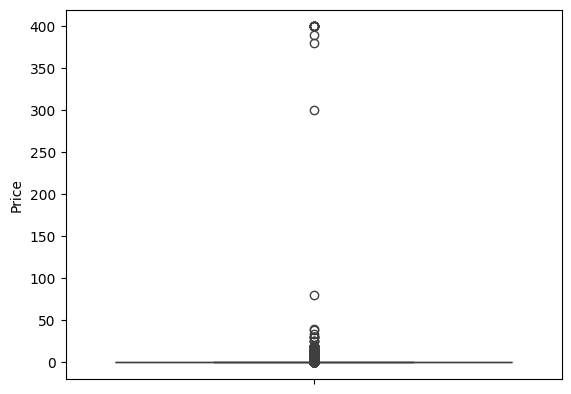

In [ ]:
#Create a box plot for the price column
sns.boxplot(inp0["Price"])
plt.show()

In [ ]:
#Check the apps with price more than 200
inp0[inp0["Price"]>200]["Price"]

,Price
4197,399.99
4362,399.99
4367,400.00
5351,399.99
5354,399.99
5355,299.99
5356,399.99
5357,379.99
5358,399.99
5359,399.99


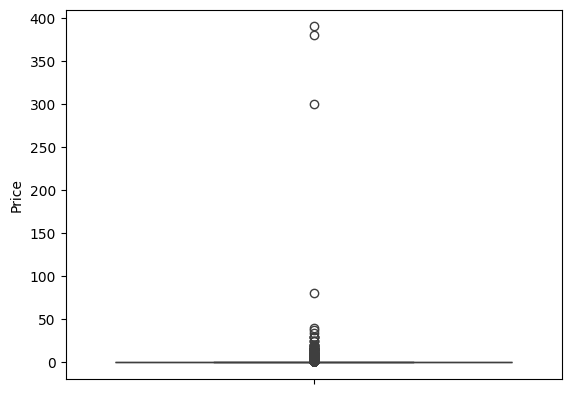

In [ ]:
#Clean the Price column
temp=inp0[inp0["Price"]<399]
sns.boxplot(temp["Price"])
plt.show()

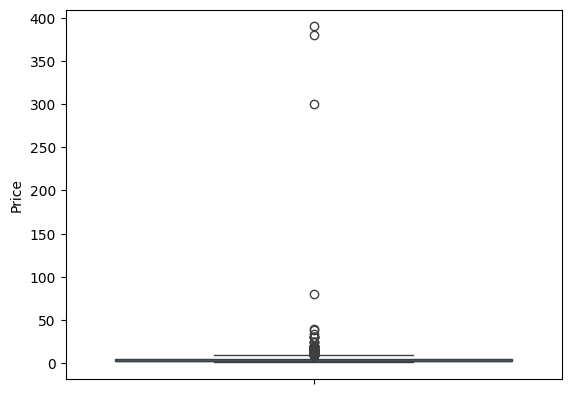

In [ ]:
#Create a box plot for paid apps
temp=temp[temp["Type"]=="Paid"]
sns.boxplot(temp["Price"])
plt.show()

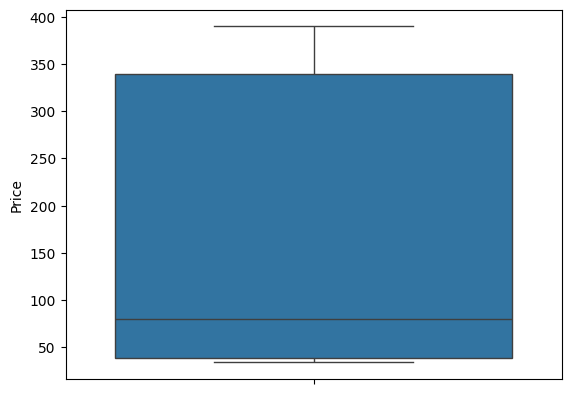

In [ ]:
#Check the apps with price more than 30
temp=temp[temp["Price"]>30]
sns.boxplot(temp["Price"])
plt.show()

#### IQR Method

In [ ]:
# Function to clean the Size column and convert to numeric (handling both 'M' and 'k')
def clean_size(size):
    if isinstance(size, str):  # Check if the size value is a string
        try:
            # Handle 'M' (Megabytes)
            if 'M' in size:
                size = size.replace('M', '')  # Remove 'M' if it's present
                return float(size)
            # Handle 'k' (Kilobytes), converting to Megabytes
            elif 'k' in size:
                size = size.replace('k', '')  # Remove 'k' if it's present
                return float(size) * 1e-3  # Convert kilobytes to megabytes
            else:
                return float(size)  # If no 'M' or 'k', return the float directly
        except ValueError:
            return np.nan  # Return NaN if conversion fails
    else:
        return size  # If it's already a number, return it as is

# Apply the clean_size function to the 'Size' column
inp0["Size"] = inp0["Size"].apply(clean_size)

# Drop rows with NaN values in the 'Size' column (if any)
inp0 = inp0.dropna(subset=["Size"])

# Check if the column is cleaned
print(inp0["Size"].head())

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64


In [ ]:
# Calculate the first quartile (25th percentile)
q1 = inp0["Size"].describe()["25%"]

# Calculate the median (50th percentile) - also known as Q2
q2 = inp0["Size"].describe()["50%"]

# Calculate the third quartile (75th percentile)
q3 = inp0["Size"].describe()["75%"]

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Define lower bound for outliers based on 1.5 * IQR rule
lb = q1 - 1.5 * iqr

# Define upper bound for outliers based on 1.5 * IQR rule
ub = q3 + 1.5 * iqr

# Cap any values greater than the upper bound to the upper bound value
inp0["Size"] = np.where(inp0["Size"] > ub, ub, inp0["Size"])

# Cap any values lower than the lower bound to the lower bound value
inp0["Size"] = np.where(inp0["Size"] < lb, lb, inp0["Size"])

 Outliers often represent abnormal data points or errors. By capping the outliers using upper and lower bounds derived from IQR, we focus on data within a reasonable range, making the analysis more robust and reliable.

In [ ]:
inp0["Size"].describe()

,Size
count,7424.000000
mean,22.031269
std,21.466385
min,0.008500
25%,5.100000
50%,14.000000
75%,33.000000
max,74.850000


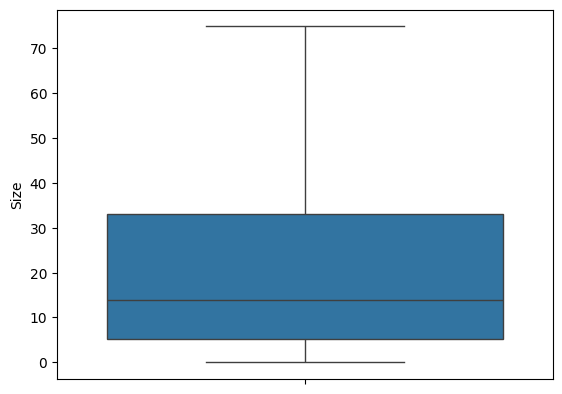

In [ ]:
sns.boxplot(inp0["Size"])
plt.show()

#### Quiz

1 - Use a box plot to identify outliers in the 'SALES' column.

2 - After identifying outliers in 'SALES', how might their presence affect the analysis? Would you choose to remove or adjust these outliers?

3 - Identify and remove outliers from the 'SALES' column using the IQR method.


In [ ]:
## Code here

#### Poll Question 2

What will be the formula for upper bound?

(a) Q3+1.5*IQR

(b) Q3-1.5*IQR

(c) Q1+1.5*IQR

(d) Q1+1.5*IQR

Sol: Option (a)

### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between $1$ and $5$ for all the apps.
- Number of reviews is less than or equal to the number of installs.
- Free apps shouldn’t have a price greater than $0$.


In [ ]:
#Perform the sanity checks on the Rating column

# This helps to identify any unexpected or incorrect values in the ratings, such as values outside the valid range (1 to 5).
print(inp0["Rating"].unique())

# This checks if any rating exceeds the expected upper bound (which should be 5).
print(inp0["Rating"].max())

# This checks if any rating is below the expected lower bound (which should be 1 or sometimes 0 if unrated).
print(inp0["Rating"].min())


[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  4.8 4.9 3.6 3.7 3.3 3.4 3.5
 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6 2.1
 1.4 1.5 1.2]
5.0
1.0


In [ ]:
#df['Rating'].describe()
#df['Rating'].value_counts()
#df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]

You can drop the rows if the ratings are not between 1 and 5. If dropping values reduces too much data, you can fill these with the median or mean rating.

In [ ]:
#median_rating = df['Rating'].median()
#df.loc[(df['Rating'] < 1) | (df['Rating'] > 5), 'Rating'] = median_rating

In [ ]:
#Perform the sanity checks on the Reviews column
inp0[inp0["Reviews"]>=inp0["Installs"]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6183,Revita.bg,HEALTH_AND_FITNESS,4.8,10,4.0,10,Free,0.00,Everyone,Health & Fitness,"June 13, 2018",3.55,4.0 and up
6700,Brick Breaker BR,GAME,5.0,7,19.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7147,CB Heroes,SOCIAL,5.0,5,1.8,5,Free,0.00,Everyone,Social,"August 4, 2018",1.2.4,5.0 and up
7402,Trovami se ci riesci,GAME,5.0,11,6.1,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4.2,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [ ]:
#inp0 = inp0[inp0["Reviews"] < inp0["Installs"]]

If the number of inconsistent rows (i.e. rows where no. of reviews > no. of installs) is small and these rows don't have much significance, you can simply drop them from the dataset.

In [ ]:
#perform the sanity checks on prices of free apps
inp0[inp0["Type"]=="Free"]["Price"].max()

0.0

Identify rows where free apps have a non-zero price.

Correct the data by setting the price to zero for free apps or drop the inconsistent rows.

Verify that all free apps now have a zero price.